In [1]:
import pandas as pd
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
# Keep only Adelie and Gentoo

penguins_subset = penguins[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]

# drop NAs

penguins_final = penguins_subset.dropna().reset_index(drop = True)

In [6]:
penguins_final

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
260,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
261,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
262,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
263,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


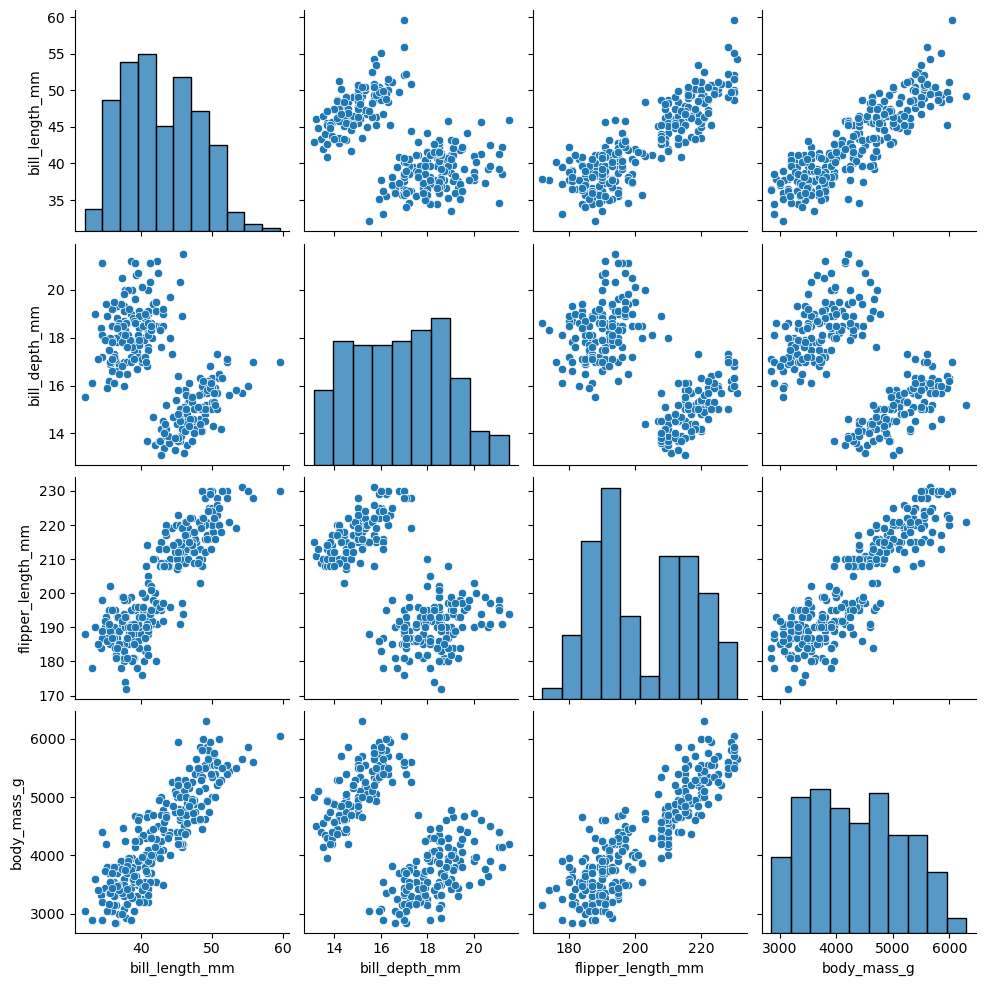

In [7]:
sns.pairplot(penguins_final)

Linear Regression Assumptions

. Linearity -- This has been met

. Normality -- Bill length and body mass are close to being normally distributed. Will confirm after building model

. Independent observations -- Dataset has rows for different penguins so no reason to believe that there is a relationship

. Homoscedasticity -- After the model has been built

In [8]:
# Focus on bill length and body mass

bill_body = penguins_final[['bill_length_mm', 'body_mass_g']]
bill_body

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
3,36.7,3450.0
4,39.3,3650.0
...,...,...
260,47.2,4925.0
261,46.8,4850.0
262,50.4,5750.0
263,45.2,5200.0


In [9]:
# Formula

ols_formula = 'body_mass_g ~ bill_length_mm' #y ~ x

In [10]:
# Import OLS function

from statsmodels.formula.api import ols

In [11]:
# Build OLS, fit model to data

OLS = ols(formula= ols_formula, data = bill_body)
model = OLS.fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.33e-85
Time:                        15:27:25   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### y = intercept + slope * X.
### y is body_mass_g . x is bill_length_mm

### g = -1707.30 + 141.19 * bill_length_mm


In [13]:
# Subset X variable which is bill length

X = bill_body['bill_length_mm']

In [14]:
# Get predictions from model

fitted_values = model.predict(X) #predicting y given x

In [15]:
# Calculate the residuals
residuals = model.resid

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

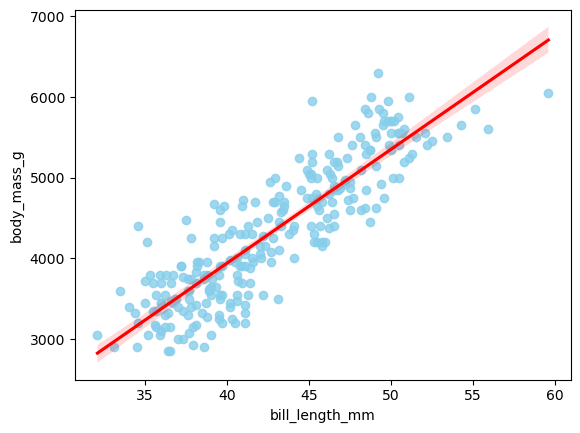

In [16]:
sns.regplot(x= 'bill_length_mm', y = 'body_mass_g', data = bill_body, color = 'skyblue', line_kws= {'color':'red'})

Checking Homoscedasticity

Text(0, 0.5, 'Residuals')

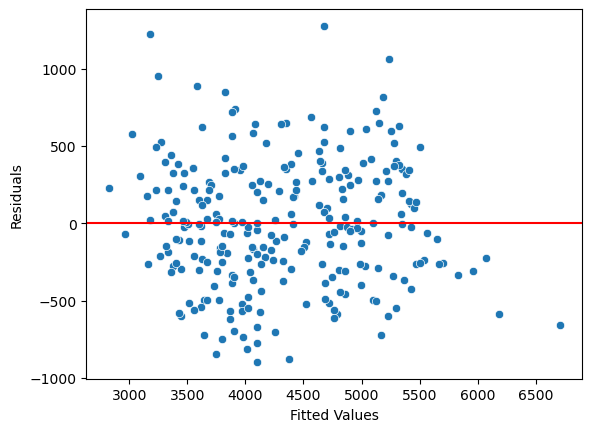

In [17]:
import matplotlib.pyplot as plt

fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.axhline(0, color = 'red')
fig.set_xlabel('Fitted Values')
fig.set_ylabel("Residuals")

# Observation : Random looking scatter plot. Homoscedasticity is assumed. Independence Assumption is also not violated

Checking the NORMALITY ASSUMPTION

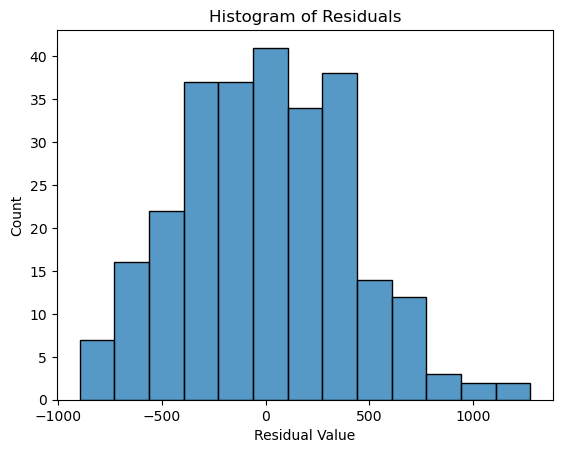

In [18]:
# Checking to see if histograms are normally distributed

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Distribution is a bit skewed to the Right.
Using a Q-Q plot to confirm normality.

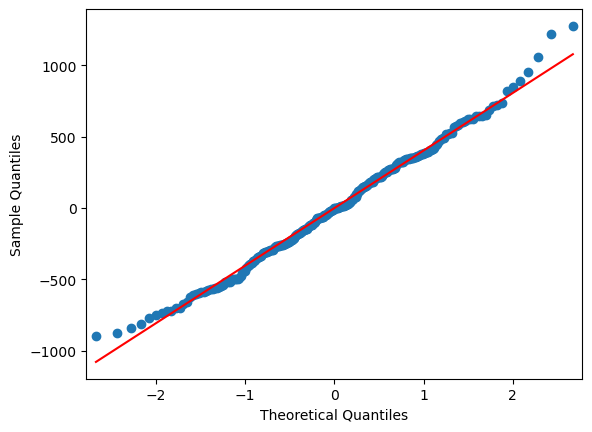

In [19]:
import statsmodels.api as sm

fig = sm.qqplot(model.resid, line = 's')

# Observations: Straight diagonal line with slight curves on the top and bottom extremes. Normality confirmed 

## Multiple Regression

In [20]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [21]:
penguins_multi_r = penguins[['body_mass_g', 'bill_length_mm', 'sex', 'species']]

In [22]:
penguins_multi_r = penguins_multi_r.rename(columns = {'sex':'gender'} )

In [23]:
penguins_multi_r.dropna(inplace= True)

penguins_multi_r.reset_index(drop = True, inplace = True)

In [24]:
penguins_multi_r.head()

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
3,3450.0,36.7,Female,Adelie
4,3650.0,39.3,Male,Adelie


### In this data the goal is to predict the Body mass, based on the other 3 variables

In [25]:
# Seperating the Independent X's and dependent Y

penguins_multi_r_X = penguins_multi_r[['bill_length_mm', 'gender', 'species']]

penguins_multi_r_Y = penguins_multi_r[['body_mass_g']]

In [26]:
penguins_multi_r_X

,bill_length_mm,gender,species
0,39.1,Male,Adelie
1,39.5,Female,Adelie
2,40.3,Female,Adelie
3,36.7,Female,Adelie
4,39.3,Male,Adelie
...,...,...,...
328,47.2,Female,Gentoo
329,46.8,Female,Gentoo
330,50.4,Male,Gentoo
331,45.2,Female,Gentoo


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Create training dataset and hold-out dataset

X_train, X_test, Y_train, Y_test = train_test_split(penguins_multi_r_X, penguins_multi_r_Y, 
                                                    test_size = 0.3, random_state = 30) #holding back 30%

In [29]:
pd.concat([X_test, Y_test], axis = 1)

,bill_length_mm,gender,species,body_mass_g
61,41.1,Male,Adelie,4100.0
114,36.2,Female,Adelie,3150.0
170,46.7,Female,Chinstrap,3300.0
100,38.6,Female,Adelie,3750.0
93,43.2,Male,Adelie,4100.0
...,...,...,...,...
130,35.6,Female,Adelie,3175.0
235,45.1,Female,Gentoo,5000.0
118,35.2,Female,Adelie,3050.0
211,49.6,Male,Chinstrap,3775.0


In [30]:
ols_data_r = pd.concat([X_train, Y_train], axis = 1)

In [31]:
# OLS formula

ols_formula_r = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

In [32]:
# Build OLS, fit model to data

OLS_r = ols(formula= ols_formula_r, data = ols_data_r )
model = OLS_r.fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     355.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           9.78e-97
Time:                        15:27:30   Log-Likelihood:                -1660.1
No. Observations:                 233   AIC:                             3330.
Df Residuals:                     228   BIC:                             3348.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2126.1817    311.586      6.824      0.000    1512.226    2740.137
C(gender)[T.Male]         572.9475     49.761     11.514      0.000     474.898     670.997
C(species)[T.Chinstrap]  -285.7267     97.797     -2.922      0.004    -478.428     -93.025
C(species)[T.Gentoo]     1088.6034     85.711     12.701      0.000     919.717    1257.489
bill_length_mm             33.2179      8.300      4.002      0.000      16.863      49.572
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.038
Skew:                           0.022   Prob(JB):                        0.981
Kurtosis:                       2.956   Cond. No.                         746.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""